# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_ordenes_ic = pd.read_csv("/datasets/instacart_orders.csv",sep=";")
df_productos = pd.read_csv("/datasets/products.csv",sep=";")
df_ordenes = pd.read_csv("/datasets/order_products.csv",sep=";")
df_pasillos = pd.read_csv("/datasets/aisles.csv",sep=";")
df_dpto = pd.read_csv("/datasets/departments.csv",sep=";")

In [3]:
print("Primeras 5 filas de df_ordenes_ic e info\n")
display(df_ordenes_ic.head())
df_ordenes_ic.info()

Primeras 5 filas de df_ordenes_ic e info



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
print("Primeras 5 filas de df_productos e info\n")
display(df_productos.head())
df_productos.info()

Primeras 5 filas de df_productos e info



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
print("Primeras 5 filas de df_ordenes e info\n")
display(df_ordenes.head())
df_ordenes.info(show_counts=True)

Primeras 5 filas de df_ordenes e info



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
print("Primeras 5 filas de df_pasillos e info\n")
display(df_pasillos.head())
df_pasillos.info()

Primeras 5 filas de df_pasillos e info



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
print("Primeras 5 filas de df_dpto e info\n")
display(df_dpto.head())
df_dpto.info()

Primeras 5 filas de df_dpto e info



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

- Del archivo instacart_orders.csv, noto los siguientes detalles:
    1. Tanto el día de la semana como la hora en la que se hizo el pedido está como un número entero, creo sería más fácil o entendible si se simplifica a una sola columna y se usara un formato datetime.
    2. la columna de días transcurridos es de tipo flotante, tal vez sería mejor tenerla como entero. También se tienen valores ausentes en dicha columna.


- Del archivo products.csv, noto los siguientes detalles:
    1. Hay valores ausentes en la columna de product_name.
    2. Tanto en la columna aisle_id como department_id se tienen valores enteros, creo que lo mejor sería utilizar los otros archivos csv para obtener los nombres descriptivos de los pasillos y sustituirlos en éste DF para una mayor claridad de la información y no tener que estar yendo a otros DF para saber que significa cada número.
    3. La columna product_name tiene strings con mayúsculas y minúsculas haciendo que haya posibles datos duplicados. 

- Del archivo order_products.csv noto los siguientes detalles:
    1. Hay valores ausentes en cuanto al orden en el que se agrego algún producto, posteriormente veré que tanto impactan éstos valores, ya que son muy pocos y podrían ser eliminados.

- Tanto del archivo aisles.csv y departments.csv, se usan más como un diccionario o para saber exactamente a que se refieren sus id en los otros archivos, como manera de simplificar la información y no saturae con texto los otros archivos. 

Como pregunta para mi examinador me gustaría saber ¿de que manera es mejor proceder en cuanto a renombrar los primeros DF?, por ejemplo en el segundo DF donde se tiene la columna deparment_id que tan correcto o conveniente es cambiarla para que en lugar de un número pueda ver el string con el nombre del departamento? 

Como yo no sé o no he leído que se me va a pedir más adelante, para mi sería mejor cambiarlos y trabajar con menos DFs aunque haya columnas con textos largos.

También, otra duda que tengo es ¿si conviene tratar de juntar los 5 DFs en uno solo y borrar las columnas que no sean relevantes? Para evitar trabajar con tantos DFs al mismmo tiempo.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución



Voy a aplicar métodos como isna(), fillna(), unique(), duplicated() para encontrar los datos tanto ausentes como duplicados y evaluar con que valores sustituir los ausentes. 

Si bien de momento hay datos ausentes en los archivos products.csv y order_products.csv, la cantidad de datos ausentes es muy baja (1258 en el primero y 836 en el segundo), yo pienso que se pueden eliminar ya que representan un porcentaje muy bajo del total de cada una de sus respectivas columnas. 

Si bien de momento no he buscado datos duplicados, una vez que los encuentre y vea cuales sean los valores duplicados ya decidiré que hacer con ellos. 

Desconozco cual pueda ser el motivo de tener valores ausentes o duplicados, tal vez algún error con la aplicacion, que las bases de datos no tienen la información completa o haya productos que ya no existen, se descontinuaron o son nuevos y no se ha actualizado la base de datos. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Para encontrar los datos duplicados voy a utilizar el método duplicated() y voy a mantener todas las columnas.
print(df_ordenes_ic[df_ordenes_ic.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

**Todos los pedidos duplicados tienen en común el día 3 (miércoles) y la hora de las 2 a.m.**

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

pedidos_mie_2am = df_ordenes_ic[df_ordenes_ic["order_dow"] == 3]
pedidos_mie_2am = pedidos_mie_2am[pedidos_mie_2am["order_hour_of_day"] == 2]
print(pedidos_mie_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? 

**Honestamente no sé que pueda significar, tal vez algún problema con la aplicación en esa hora...**

In [10]:
# Elimina los pedidos duplicados
df_ordenes_ic.drop_duplicates(inplace=True)
df_ordenes_ic.reset_index(drop=True)
print(df_ordenes_ic.duplicated().sum())

0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_ordenes_ic[df_ordenes_ic.duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
dup_order_id = df_ordenes_ic["order_id"].duplicated().sum()
print(dup_order_id)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Al tener lineas completamente iguales procedí a eliminarlas e hice un reset al índice del dataframe original.**

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_productos[df_productos.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_productos["department_id"].duplicated().sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_productos["product_name"] = df_productos["product_name"].str.lower()
print(df_productos["product_name"].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_productos[df_productos["product_name"].duplicated()])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
71              

Describe brevemente tus hallazgos y lo que hiciste con ellos. 

**Los únicos datos duplicados que encontré en el DF de la columna product_name son los datos ausentes que se habían detectado desde el inicio.**

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_ordenes.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_ordenes["product_id"].duplicated().sum())

4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos. 

**No hay líneas completamente duplicadas por lo cual no hay nada que hacer en este DF.**

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_pasillos.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
df_pasillos["aisle"] = df_pasillos["aisle"].str.lower() # Este método solo lo utilice para comprobar que no hay nombres dupplicados
print("Valores duplicados en la columna aisle_id")
print(df_pasillos["aisle_id"].duplicated().sum())
print("Valores duplicados en la columna aisle")
print(df_pasillos["aisle"].duplicated().sum())

Valores duplicados en la columna aisle_id
0
Valores duplicados en la columna aisle
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**No hay ningún valor duplicado en este DF.**

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_dpto.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_dpto["department"] = df_dpto["department"].str.lower() # Este método solo lo utilice para comprobar que no hay nombres dupplicados
print("Valores duplicados en la columna department_id")
print(df_dpto["department_id"].duplicated().sum())
print("Valores duplicados en la columna department")
print(df_dpto["department"].duplicated().sum())

Valores duplicados en la columna department_id
0
Valores duplicados en la columna department
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**No hay ningún valor duplicado en este DF.**

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_productos[df_productos["product_name"].isna()])
df_aisle100_dpto21 = df_productos[df_productos["product_name"].isna()]

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

**Todos los valores ausentes del DF principal tienen en común el pasillo número 100 del departamento 21**

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_aisle100_dpto21["aisle_id"].unique())

[100]


Describe brevemente cuáles son tus hallazgos.

**El mismo DF de los pasillos denomina al pasillo 100 como perdidos**

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_aisle100_dpto21["department_id"].unique())

[21]


Describe brevemente cuáles son tus hallazgos.

**El mismo DF de los departamentos denomina al departamento 21 como perdidos**

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_pasillos[df_pasillos["aisle_id"] == 100])
print()
print(df_dpto[df_dpto["department_id"]==21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_productos["product_name"] = df_productos["product_name"].fillna("unknown")
print(df_productos.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_ordenes_ic.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
dias_ausentes_pedido1 = df_ordenes_ic[df_ordenes_ic.isna().any(axis=1)] 

# Aún y cuando con la línea anterior pareciera que todos los valores ausentes tienen el valor de 1 en el número de orden
# me aseguré con la siguiente línea de código que solo sean los valores donde el número de orden sea el 1.

dias_ausentes_pedido1 = dias_ausentes_pedido1[dias_ausentes_pedido1["order_number"] == 1]
print(dias_ausentes_pedido1)
print("Aquí comprobamos que solo hay valores de 1 en order_number")
print(dias_ausentes_pedido1["order_number"].unique())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**Arriba describí como encontré los valores ausentes (isna), que método utilicé(fillna) y que valor le asigné y el porque (median)**

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
add_to_cart_nan = df_ordenes[df_ordenes.isna().any(axis=1)]
print(add_to_cart_nan)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'El valor mínimo de la columna add_to_cart_order es: {df_ordenes["add_to_cart_order"].min()}')
print(f'El valor máximo de la columna add_to_cart_order es: {df_ordenes["add_to_cart_order"].max()}')

El valor mínimo de la columna add_to_cart_order es: 1.0
El valor máximo de la columna add_to_cart_order es: 64.0


Describe brevemente cuáles son tus hallazgos.

**El carrito con mayor cantidad de productos fue de 64 productos.**

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
add_to_cart_nan = add_to_cart_nan.groupby("order_id").count()
add_to_cart_nan = add_to_cart_nan.reset_index()
print(add_to_cart_nan)

    order_id  product_id  add_to_cart_order  reordered
0       9310           1                  0          1
1      61355          63                  0         63
2     102236          31                  0         31
3     129627           5                  0          5
4     165801           6                  0          6
..       ...         ...                ...        ...
65   2999801           6                  0          6
66   3125735          22                  0         22
67   3308010          51                  0         51
68   3347453           7                  0          7
69   3383594           5                  0          5

[70 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? Ya que tengo agrupados los 
# id de pedidos con valores ausentes, voy a filtrar el DF principal por id de pedidos y después
# unirlo con el ya filtrado anteriormente para obtener la columna add_to_cart_order.

add_to_cart_nan = add_to_cart_nan.drop(["product_id","add_to_cart_order","reordered"],axis=1)
df_por_pedidos = df_ordenes.groupby("order_id").count()
df_por_pedidos = df_por_pedidos.reset_index()
df_por_pedidos = df_por_pedidos.drop(["product_id","reordered"],axis=1)
df_merged = add_to_cart_nan.merge(df_por_pedidos,on="order_id")
print(df_merged)

    order_id  add_to_cart_order
0       9310                 64
1      61355                 64
2     102236                 64
3     129627                 64
4     165801                 64
..       ...                ...
65   2999801                 64
66   3125735                 64
67   3308010                 64
68   3347453                 64
69   3383594                 64

[70 rows x 2 columns]


**No estoy seguro de los últimos dos resultados de agrupar por la columan de orden y productos pero fue como lo entendí** 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_ordenes["add_to_cart_order"] = df_ordenes["add_to_cart_order"].fillna(999.0)
df_ordenes["add_to_cart_order"] = df_ordenes["add_to_cart_order"].astype("int")
print("Información general del df:")
df_ordenes.info(show_counts=True)

Información general del df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


**Podría el examinador explicarme porque a los valores nulos de este DF se le asigno el 999? para mi hubiera sido mejor eliminarlos ya que son muy pocos valores nulos.**

## Conclusiones

**Aplique distintos métodos para evaluar y revisar los valores ausentes y al final remplazarlos por el o los valores más adecuados.**


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(f'Valor mínimo de la columna order_hour_of_day: {df_ordenes_ic["order_hour_of_day"].min()}')
print(f'Valor mínimo de la columna order_hour_of_day: {df_ordenes_ic["order_hour_of_day"].max()}')
print(f'Valor mínimo de la columna order_dow: {df_ordenes_ic["order_dow"].min()}')
print(f'Valor mínimo de la columna order_dow: {df_ordenes_ic["order_dow"].max()}')

Valor mínimo de la columna order_hour_of_day: 0
Valor mínimo de la columna order_hour_of_day: 23
Valor mínimo de la columna order_dow: 0
Valor mínimo de la columna order_dow: 6


**Los datos están bien delimitados en cuanto al formato de 0-23 horas y 0-6 días** 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

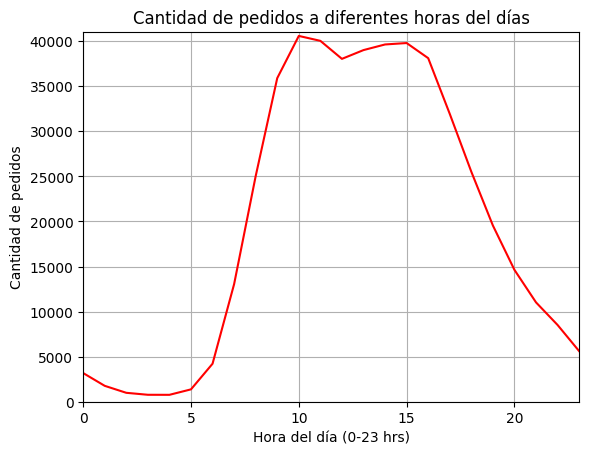

In [36]:
df_ord_num_pedidos = df_ordenes_ic.groupby("order_hour_of_day")["order_number"].count()
df_ord_num_pedidos.plot(title="Cantidad de pedidos a diferentes horas del días",
                   xlabel="Hora del día (0-23 hrs)",
                   ylabel="Cantidad de pedidos",
                   legend=False,
                   grid=True,
                   color="red",
                   xlim=[0,23],
                   ylim=[0,41000])
plt.show()

**La mayoría de los pedidos se suelen hacer entre las 10 am y las 15 pm**

### [A3] ¿Qué día de la semana compran víveres las personas?

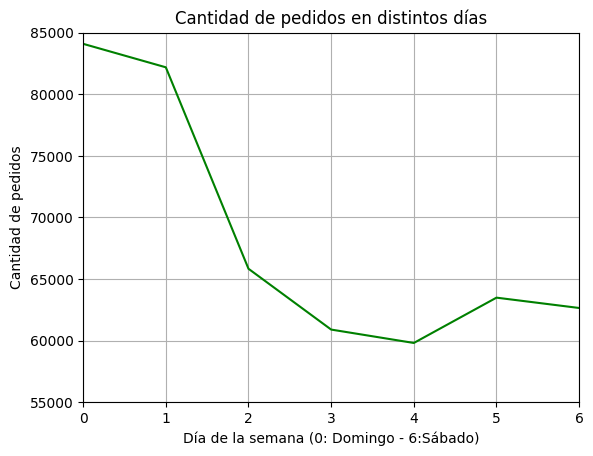

In [37]:
df_ord_num_pedidos = df_ordenes_ic.groupby("order_dow")["order_number"].count()
df_ord_num_pedidos.plot(title="Cantidad de pedidos en distintos días",
                   xlabel="Día de la semana (0: Domingo - 6:Sábado)",
                   ylabel="Cantidad de pedidos",
                   legend=False,
                   grid=True,
                   color="green", 
                   xlim=[0,6],
                   ylim=[55000,85000])
plt.show()

**Las personas hacen más pedidos los días Domingo y Lunes**

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

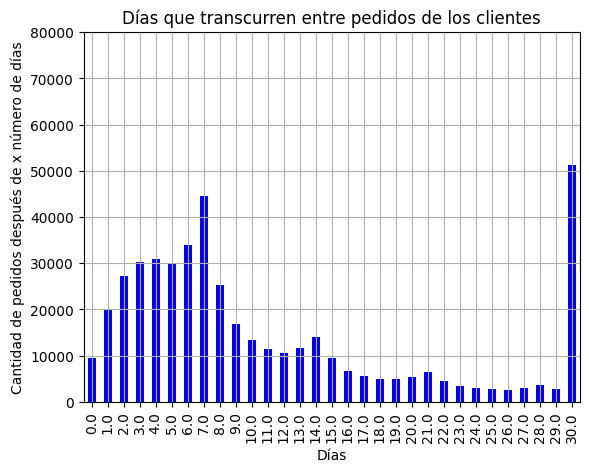

In [38]:
df_ord_dias_ult_orden = df_ordenes_ic.groupby("days_since_prior_order")["order_number"].count()
df_ord_dias_ult_orden.plot(title="Días que transcurren entre pedidos de los clientes",
                    xlabel="Días",
                    ylabel="Cantidad de pedidos después de x número de días",
                    kind="bar",
                    legend=False,
                    grid=True,
                    color="blue", 
                    xlim=[0,30],
                    ylim=[0,80000])
plt.show()

### Conclusiones

**Como bien lo observamos cuando queriamos sustituir los valores ausentes en el DF df_ordenes_ic, la gente suele esperar al menos 1 semana para volver a hacer un pedido en la aplicación.**

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

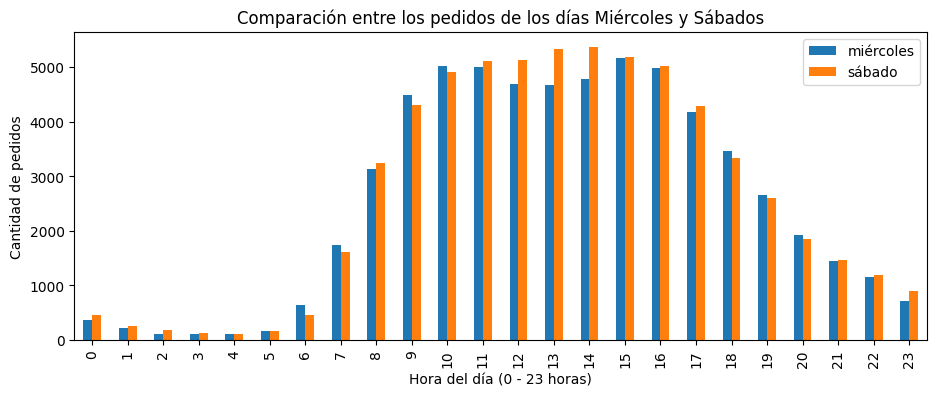

In [39]:
# Primero voy a filtrar el DF principal en 2 DFs donde solo haya order_dow igual a 3 y 6, para obtener la información de los
# miércoles y sábados.

df_mie = df_ordenes_ic[df_ordenes_ic["order_dow"]==3]
df_sab = df_ordenes_ic[df_ordenes_ic["order_dow"]==6]
df_mie = df_mie.groupby("order_hour_of_day")["order_id"].count()
df_mie.name = "miércoles"
df_sab = df_sab.groupby("order_hour_of_day")["order_id"].count()
df_sab.name = "sábado"

# Después voy a unir ambos Series en un DF 

df_combinados = pd.concat([df_mie,df_sab],axis="columns")

# Y ahora solo imprimo el gráfico de barras.

df_combinados.plot(title="Comparación entre los pedidos de los días Miércoles y Sábados",
            xlabel="Hora del día (0 - 23 horas)",
            ylabel="Cantidad de pedidos",
            kind="bar",figsize=[11,4])
plt.show()

**Hay mucha similitud entre ambos días, sin embargo la gente suele hacer más pedidos entre las 12 pm y las 14 pm**

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

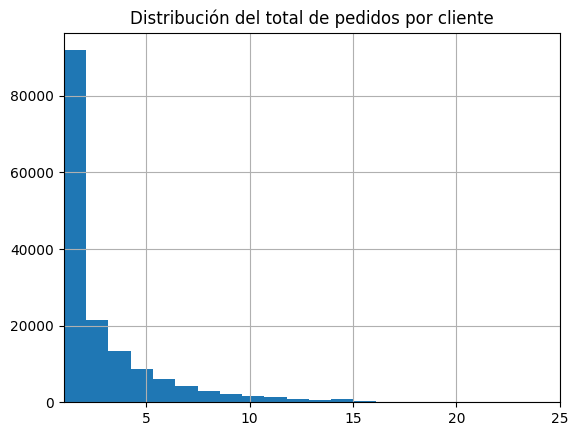

In [40]:
# Primero voy a agrupar en un DF que contiene la sumatoria del total de veces que un usuario ha hecho cierto número de pedidos

df_order_user = df_ordenes_ic.groupby("user_id").count()
df_order_user = df_order_user.drop(["order_number","order_dow","order_hour_of_day","days_since_prior_order"],axis=1)

# Y ahora la graficamos 

df_order_user.hist(column="order_id",bins=25)
plt.title("Distribución del total de pedidos por cliente")
plt.xlim(1,25)
plt.show()

**La mayoría de las personas ha hecho entre 1 a 4 pedidos y ya apartir de ahí se ve una caída exponencial y apartir de los 40 pedidos ya la gráfica tiende a no cambiar mucho**

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [41]:
df_prod_mas_populares = df_ordenes.groupby("product_id").count()
df_prod_mas_populares = df_prod_mas_populares.sort_values("order_id",ascending=False)

prod_20_mas_populares = df_prod_mas_populares.index
prod_20_mas_populares = prod_20_mas_populares[:20]

con = 1
print("Estos son los 20 productos más populares:")
for prod in prod_20_mas_populares:
    for product in df_productos["product_id"]:
        if prod == product:
            actual_index = product - 1
            print(f'{con}.- ID: {prod} - Nombre: {df_productos.loc[actual_index,"product_name"]}')
            con +=1

Estos son los 20 productos más populares:
1.- ID: 24852 - Nombre: banana
2.- ID: 13176 - Nombre: bag of organic bananas
3.- ID: 21137 - Nombre: organic strawberries
4.- ID: 21903 - Nombre: organic baby spinach
5.- ID: 47209 - Nombre: organic hass avocado
6.- ID: 47766 - Nombre: organic avocado
7.- ID: 47626 - Nombre: large lemon
8.- ID: 16797 - Nombre: strawberries
9.- ID: 26209 - Nombre: limes
10.- ID: 27845 - Nombre: organic whole milk
11.- ID: 27966 - Nombre: organic raspberries
12.- ID: 22935 - Nombre: organic yellow onion
13.- ID: 24964 - Nombre: organic garlic
14.- ID: 45007 - Nombre: organic zucchini
15.- ID: 39275 - Nombre: organic blueberries
16.- ID: 49683 - Nombre: cucumber kirby
17.- ID: 28204 - Nombre: organic fuji apple
18.- ID: 5876 - Nombre: organic lemon
19.- ID: 8277 - Nombre: apple honeycrisp organic
20.- ID: 40706 - Nombre: organic grape tomatoes


**En toda la lista predominan las frutas y verduras orgánicas, y también aparece algún lácteo como la leche en la lista.**

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

El valor mínimo es de: 1 artículo
El valor máximo es de: 127 artículos
El valor promedio es de: 10.098983215049127 artículos


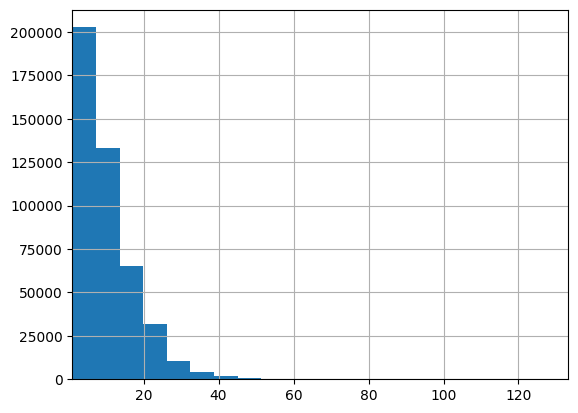

In [42]:
df_por_orden = df_ordenes.groupby("order_id").count()
df_por_orden = df_por_orden.reset_index()
df_por_orden = df_por_orden.drop(["add_to_cart_order","reordered"],axis=1)
print(f'El valor mínimo es de: {df_por_orden["product_id"].min()} artículo')
print(f'El valor máximo es de: {df_por_orden["product_id"].max()} artículos')
print(f'El valor promedio es de: {df_por_orden["product_id"].mean()} artículos')

df_por_orden['product_id'].hist(bins=20)
plt.xlim(1)
plt.show()

**Con la gráfica podemos observar que la mayoría de pedidos suele ser de entre 30 productos que es donde predomina el color azul oscuro. También con las líneas de arriba podemos ver que la máxima cantidad que se han pedido es 127 y el promedio es de al rededor de 10 artículos.**

**No estoy seguro de si aquí estaban esperando ver un histograma, pero no pude representar la gráfica como un histograma =(**

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [43]:
# Primero voy a separar el DF con solo los las personas que han hecho repetido algún producto, 
# o que tienen un 1 en la columna reordered.

reordered_df = df_ordenes[df_ordenes["reordered"] == 1]

# Después voy a agrupar por la columna product_id y utilizar count() para saber cuales han sido
# los más populares

prod_mas_reordenados = reordered_df.groupby("product_id").count()
prod_mas_reordenados = prod_mas_reordenados.sort_values("order_id",ascending=False)

# Después hago una lista con los id de los primeros 20 

prod_20_reo_populares = prod_mas_reordenados.index
prod_20_reo_populares = prod_20_reo_populares[:20]

# Y por último utilizo un ciclo de dos fors anidados para buscar cada uno de los id de la lista en 
# la columna del DF product_id y obtener su nombre

con = 1
print("Estos son los 20 productos más populares que se han reordenado:")
for prod in prod_20_reo_populares:
    for product in df_productos["product_id"]:
        if prod == product:
            actual_index = product - 1
            print(f'{con}.- ID: {prod} - Nombre: {df_productos.loc[actual_index,"product_name"]}')
            con +=1

Estos son los 20 productos más populares que se han reordenado:
1.- ID: 24852 - Nombre: banana
2.- ID: 13176 - Nombre: bag of organic bananas
3.- ID: 21137 - Nombre: organic strawberries
4.- ID: 21903 - Nombre: organic baby spinach
5.- ID: 47209 - Nombre: organic hass avocado
6.- ID: 47766 - Nombre: organic avocado
7.- ID: 27845 - Nombre: organic whole milk
8.- ID: 47626 - Nombre: large lemon
9.- ID: 27966 - Nombre: organic raspberries
10.- ID: 16797 - Nombre: strawberries
11.- ID: 26209 - Nombre: limes
12.- ID: 22935 - Nombre: organic yellow onion
13.- ID: 24964 - Nombre: organic garlic
14.- ID: 45007 - Nombre: organic zucchini
15.- ID: 49683 - Nombre: cucumber kirby
16.- ID: 28204 - Nombre: organic fuji apple
17.- ID: 8277 - Nombre: apple honeycrisp organic
18.- ID: 39275 - Nombre: organic blueberries
19.- ID: 5876 - Nombre: organic lemon
20.- ID: 49235 - Nombre: organic half & half


**Muchos de los productos más populares aparecen en esta lista, sin embargo, solo el último producto de la lista fue uno distinto. por lo cual esto nos dice que los 20 productos más comprados, son también los que se piden de nueva vez.**

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

       product_id  veces_reordenadas  total_pedidos  distribución
0               1                158            280      0.564286
1               3                 31             42      0.738095
2               4                 25             49      0.510204
3               7                  1              2      0.500000
4               8                  6             19      0.315789
...           ...                ...            ...           ...
36223       49690                  4              5      0.800000
36224       49691                 31             72      0.430556
36225       49692                  5             12      0.416667
36226       49693                 11             25      0.440000
36227       49694                  3              9      0.333333

[36228 rows x 4 columns]


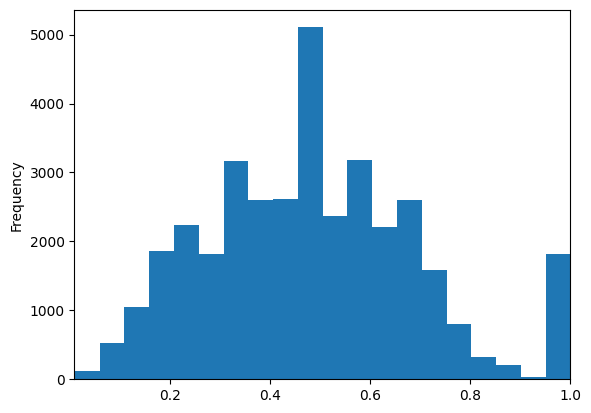

In [44]:
# Primero del DF original vamos a obtener el número de pedidos totales para todos los productos.
# Agrupamos por productos para tener tanto los que se ordenaron 1 vez, como los que se han llegado
# a reordenar

df_total_prod_pedidos = df_ordenes.groupby("product_id").count()
df_total_prod_pedidos = df_total_prod_pedidos.reset_index()
df_total_prod_pedidos = df_total_prod_pedidos.drop(["add_to_cart_order","reordered"],axis=1)

# Segundo hay que filtrar el DF para tener solo los productos reordenados

df_reordered_productos = df_ordenes[df_ordenes["reordered"]==1]
df_reordered_productos = df_reordered_productos.groupby("product_id").count()
df_reordered_productos = df_reordered_productos.reset_index()
df_reordered_productos = df_reordered_productos.drop(["add_to_cart_order","reordered"],axis=1)

# Ahora voy a unir los DF con merge() cambiar los nombres de las columnas que se han unido 
# y en una nueva columna calcular la distribución.

merged_df = df_reordered_productos.merge(df_total_prod_pedidos,on="product_id")
nombres_nuevos = ["product_id","veces_reordenadas","total_pedidos"]
merged_df.columns = nombres_nuevos
merged_df["distribución"] = merged_df["veces_reordenadas"] / merged_df["total_pedidos"]
print(merged_df)

merged_df["distribución"].plot(kind="hist",bins=20)
plt.xlim(0.01,1)
plt.show()

**Al buscar el máximo en el DF ya combinado se obtienen poco más de 1800 productos con una distribución de 1 por lo cual todos estos siempre se han reordenado.**

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

        user_id  prod_reor_totales  prod_totales  distribución
0             2                  1            26      0.038462
1             4                  0             2      0.000000
2             5                  8            12      0.666667
3             6                  0             4      0.000000
4             7                 13            14      0.928571
...         ...                ...           ...           ...
157432   206203                  6            27      0.222222
157433   206206                 15            21      0.714286
157434   206207                 41            46      0.891304
157435   206208                 87           125      0.696000
157436   206209                  8            25      0.320000

[157437 rows x 4 columns]


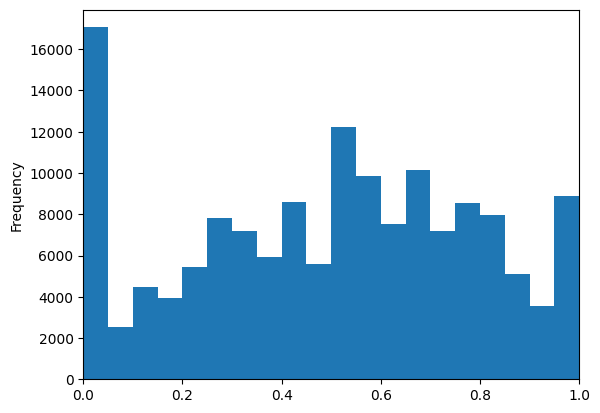

In [45]:
# Primero voy a agrupar un DF con todos los ID de usuarios, eliminaré las columnas que están sobrando
# y después uniré éste DF nuevo con merge para obtener uno nuevo con todos los usuarios y sus pedidos. 

df_usuarios = df_ordenes_ic.groupby("user_id").count()
df_usuarios = df_usuarios.reset_index()
df_usuarios = df_usuarios.drop(["order_id","order_number","order_dow","order_hour_of_day","days_since_prior_order"],axis=1)
df_usuarios = df_usuarios.merge(df_ordenes_ic,on="user_id")[["user_id","order_id"]]

# Ahora voy a usar el DF de df_ordenes SIN filtrar los productos reordenados para obtener el total
# de productos de todos los pedidos 

df_pedidos_ordenes = df_ordenes.groupby("order_id").count()
df_pedidos_ordenes = df_pedidos_ordenes.reset_index()
df_pedidos_ordenes = df_pedidos_ordenes.drop(["add_to_cart_order","reordered"],axis=1)
nombres_columnas = ["order_id","prod_totales"]
df_pedidos_ordenes.columns= nombres_columnas

# Ahora voy a unir estos nuevos DF para obtener el total de productos por pedido de todos los clientes.

merged_df = df_usuarios.merge(df_pedidos_ordenes,on="order_id",how="left")

# Volvemos al DF df_ordenes para ahora SI filtrar los productos reordenados y hacer los mismos 2 pasos 
# anteriores. 

df_ordenes = df_ordenes[df_ordenes["reordered"]==1]
df_pedidos_reorden = df_ordenes.groupby("order_id").count()
df_pedidos_reorden = df_pedidos_reorden.reset_index()
df_pedidos_reorden = df_pedidos_reorden.drop(["add_to_cart_order","reordered"],axis=1)
nombres_columnas = ["order_id","prod_reor_totales"]
df_pedidos_reorden.columns = nombres_columnas
merged_df = merged_df.merge(df_pedidos_reorden,on="order_id",how="left")

# Como hay algunos pedidos completos donde ninguno de los productos ha sido reordenado es por esto que
# hay un resultado de valores nulos, voy a llenar dichos valores con 0. Y vamos a darle un tipo de valor 
# int a la columna prod_reor_totales.

merged_df["prod_reor_totales"] = merged_df["prod_reor_totales"].fillna(0)
merged_df["prod_reor_totales"] = merged_df["prod_reor_totales"].astype("int")

# Ahora vamos a agrupar por usuarios y obtener la suma de todoas las ordenes y lso productos totales y
# reordenados.

merged_df = merged_df.groupby("user_id").sum()
merged_df = merged_df.reset_index()
merged_df["prod_totales"] = merged_df["prod_totales"].astype("int")
merged_df["distribución"] = merged_df["prod_reor_totales"] / merged_df["prod_totales"]
merged_df = merged_df.drop("order_id",axis=1)
merged_df = merged_df[["user_id","prod_reor_totales","prod_totales","distribución"]]
print(merged_df)

merged_df["distribución"].plot(kind="hist",bins=20)
plt.xlim(0,1)
plt.show()

**Hay 8102 clientes que tienen una distribución de 1, lo cual nos dice que todos los productos que han pedido, los han vuelto a comprar**

**Este fue el paso más complicado de procesar e idear como debía de resolver, pero al mismo tiempo el más satisfactorio (si es que llega a estar correcto jaja).**

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [46]:
# Primero voy a filtrar el DF con un 1 en la columna "add_to_cart_order" 

df_primer_producto = df_ordenes[df_ordenes["add_to_cart_order"] == 1]

# Después voy a agrupar por la columna product_id y el número de veces que fue elegido como 
# el número 1 en el carrito.

df_primer_producto = df_primer_producto.groupby("product_id").count()
df_primer_producto = df_primer_producto.sort_values(by="order_id",ascending=False)
primer_producto_20 = df_primer_producto.index
primer_producto_20 = primer_producto_20[:20]

# Y ahora con dos 2 fors anidados obtengo su ID, nombre y con el Series times_primer
# producto utilizo el valor que obtuve con el método count que son el número de veces
# que fueron el primer artículo en añadirse al carrito. 

con = 1
print("Estos son los 20 productos que los clientes primero ponen en su carrito:")
for prod in primer_producto_20:
    for product in df_productos["product_id"]:
        if prod == product:
            actual_index = product - 1
            print(f'{con}.- ID: {prod} - Nombre: {df_productos.loc[actual_index,"product_name"]}, fue elegido como el primero {df_primer_producto.loc[product,"order_id"]} veces')
            con +=1


Estos son los 20 productos que los clientes primero ponen en su carrito:
1.- ID: 24852 - Nombre: banana, fue elegido como el primero 13725 veces
2.- ID: 13176 - Nombre: bag of organic bananas, fue elegido como el primero 9626 veces
3.- ID: 27845 - Nombre: organic whole milk, fue elegido como el primero 3766 veces
4.- ID: 21137 - Nombre: organic strawberries, fue elegido como el primero 3126 veces
5.- ID: 47209 - Nombre: organic hass avocado, fue elegido como el primero 2736 veces
6.- ID: 21903 - Nombre: organic baby spinach, fue elegido como el primero 2641 veces
7.- ID: 47766 - Nombre: organic avocado, fue elegido como el primero 2434 veces
8.- ID: 19660 - Nombre: spring water, fue elegido como el primero 2021 veces
9.- ID: 16797 - Nombre: strawberries, fue elegido como el primero 1725 veces
10.- ID: 27966 - Nombre: organic raspberries, fue elegido como el primero 1660 veces
11.- ID: 44632 - Nombre: sparkling water grapefruit, fue elegido como el primero 1589 veces
12.- ID: 49235 - No

**Las frutas y verduras siguen predominando como lo primero que la gente suele poner en sus carritos al iniciar sus compras, hay algunas excepciones como la leche y la soda, pero en su mayoría son productos de tipo frutas y verduras**

### Conclusion general del proyecto:

**En general, éste proyecto fue el más retador en cuanto a aplicación de conocimientos, ya que implicó mucho escribir código
en base a la prueba-error, idear cuales son los datos que necesito obtener, pensar como obtenerlos, como trabajarlos, usarlos,
etc, fue algo complicado de sobrellevar pero el poder haber completado el proyecto (que falta que sea revisado) es muy 
satisfactorio.** 

**Todos los hallazgos, métodos, funciones, etc que utilicé lo expliqué ya sea en los markdowns o en las mismas líneas de código.
No creo estar 100% correcto en todo lo que hice, pero me siento satisfecho con el resultado y ya espero con ansias los
comentarios del examinador para saber que apliqué bien, que cosas no, y de ser necesario volver a trabjar en la revisón de éste
proyecto.**

